Title: Symmetric Linear Systems and Quadratic Forms
Author: Thomas Breuel
Institution: UniKL

# Symmetric Linear Systems

(system of linear equations)

\begin{eqnarray}
2 x_1 + 4 x_2 & = & 2 \\\
4 x_1 + 11 x_2 & = & 1 \\\
\end{eqnarray}

(system of linear equations in matrix form)

$$ M x = b $$

$$ M = \left(\begin{array}{cc}2 & 4 \\\ 4 & 11 \\\ \end{array}\right) $$

Note that $M$ is symmetric in this case. Symmetric linear systems are special.

(factorizations)

There are a number of common factorizations of the matrix $M$:

- $A^TCA$ - source of problem, dynamical systems or statistics; $A$ may be a rectangular matrix
- $LDL^T$ - Gaussian elimination, $L$: lower triangular, $D$: diagonal
- $Q\Lambda Q^T$ - orthogonal $Q$ (eigenvectors), diagonal $\Lambda$ (eigenvalues)

(minimization vs solution)

minimize $\frac{1}{2} x^T M x - x^T b$

solve $M x = b$

Note that you can derive this basically by differentiation:

$$\nabla_x (\frac{1}{2} x^T M x - x^T b) = M x - b = 0$$

# Quadratic Forms

(quadratic forms)

Quadratic forms are "quadratic functions of vectors", like this:

$$ f(x) = u x_1^2 + v x_2 ^ 2 $$

We write a quadratic as with a matrix, like this:

$$ f(x) = x^T M x $$

where

$$ M = \left(\begin{array}{cc}u & 0 \\\ 0 & v \\\ \end{array}\right) $$

Therefore, a matrix $M$ is sometimes used as a linear function, $f(x) = Mx$, and sometimes as a quadratic form $f(x) = x^TMx$.

(-3.0, 3.0)

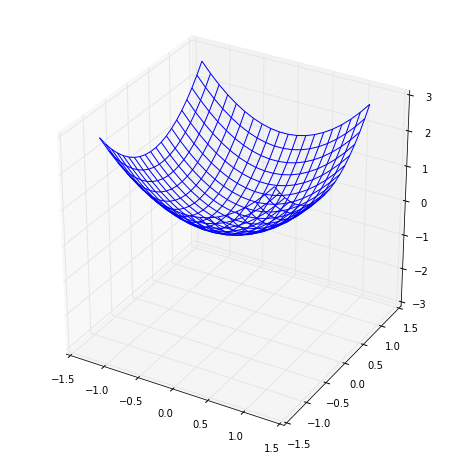

In [3]:
# positive definite
from mpl_toolkits.mplot3d import Axes3D
subplots(1,1,figsize=(8,8))
x,y = meshgrid(linspace(-1.2,1.2,20),linspace(-1.2,1.2,20))

z = x**2+y**2

ax = gcf().add_subplot(111,projection='3d')
ax.plot_wireframe(x,y,z)
ax.set_zlim3d(-3.0,3.0)

(-3.0, 3.0)

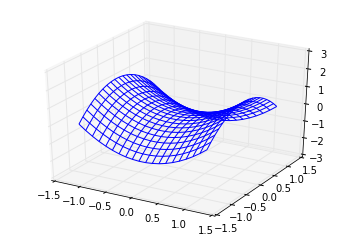

In [4]:
# indefinite
z = x**2-y**2

ax = gcf().add_subplot(111,projection='3d')
ax.plot_wireframe(x,y,z)
ax.set_zlim3d(-3.0,3.0)

(-3.0, 3.0)

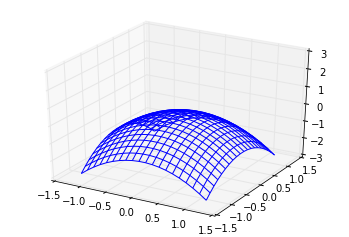

In [5]:
# negative definite
z = -x**2-y**2

ax = gcf().add_subplot(111,projection='3d')
ax.plot_wireframe(x,y,z)
ax.set_zlim3d(-3.0,3.0)

(definiteness of matrices)

positive definite:

$$ M = \left(\begin{array}{cc}1 & 0 \\\ 0 & 1 \\\ \end{array}\right) $$

indefinite:

$$ M = \left(\begin{array}{cc}1 & 0 \\\ 0 & -1 \\\ \end{array}\right) $$

negative definite:

$$ M = \left(\begin{array}{cc}-1 & 0 \\\ 0 & -1 \\\ \end{array}\right) $$


<matplotlib.contour.QuadContourSet instance at 0x326a950>

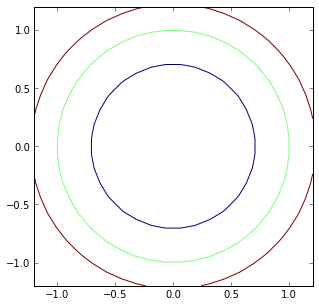

In [6]:
# level sets and contour plot
figsize(5,5)
x,y = meshgrid(linspace(-1.2,1.2,20),linspace(-1.2,1.2,20))
z = x**2+y**2
contour(x,y,z,levels=[0.5,1,1.5])

<matplotlib.contour.QuadContourSet instance at 0x2f7f878>

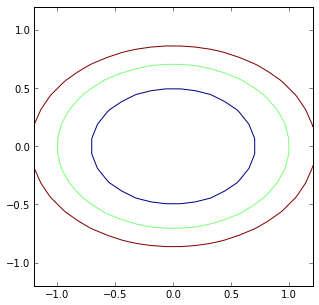

In [7]:
# ellipses
figsize(5,5)
x,y = meshgrid(linspace(-1.2,1.2,20),linspace(-1.2,1.2,20))
z = x**2+2*y**2
contour(x,y,z,levels=[0.5,1,1.5])

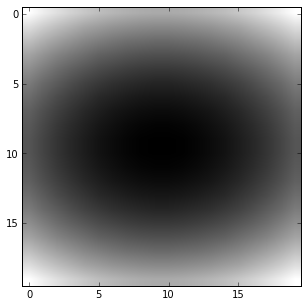

In [8]:
# quadratic form in intensity
imshow(z,cmap=cm.gray)

<matplotlib.contour.QuadContourSet instance at 0x3739c68>

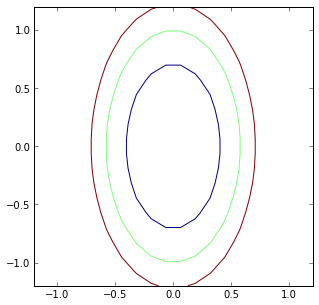

In [9]:
# evaluation of quadratic form in matrix form
M = array([[3.0,0.0],[0.0,1.0]])
z = apply_along_axis(lambda x:dot(x,dot(M,x)),0,array([x,y]))
contour(x,y,z,levels=[0.5,1,1.5])

In [10]:
# 2D rotation matrix
def rotation(a):
    return array([[cos(a),-sin(a)],[sin(a),cos(a)]])

print rotation(0.7)
print dot(rotation(0.7).T,rotation(0.7))
print dot(rotation(0.7),rotation(0.7).T)

[[ 0.76484219 -0.64421769]
 [ 0.64421769  0.76484219]]
[[ 1.  0.]
 [ 0.  1.]]
[[ 1.  0.]
 [ 0.  1.]]


<matplotlib.contour.QuadContourSet instance at 0x3a8dcf8>

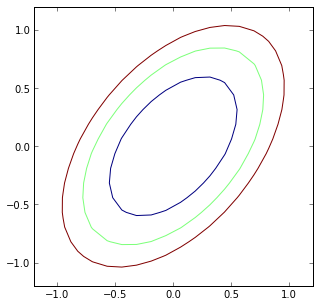

In [11]:
# "rotated" quadratic form
M = array([[3.0,0.0],[0.0,1.0]])
Mr = dot(rotation(0.7).T,dot(M,rotation(0.7)))
z = apply_along_axis(lambda x:dot(x,dot(Mr,x)),0,array([x,y]))
contour(x,y,z,levels=[0.5,1,1.5])

In [12]:
Mr

array([[ 2.16996714, -0.98544973],
       [-0.98544973,  1.83003286]])

# Positive Definiteness

Assume $A$ is a rectangular matrix with linearly independent columns.

Claim: $A^T A$ is positive definite.

I.e. $x^T A^T A x > 0$ for all $x\neq 0$.

$$x^T A^T A x = (A x)^T (A x) = ||A x||^2$$

Clearly $\geq 0$. $A x = 0$ only for a linear combination of columns that is zero, but that's only for $x=0$.

# Eigenvalues and Eigenvectors

(definition)

$$ M x = \lambda x $$

If $M$ is diagonal, this is really simple: pick an axis aligned unit vector as $x$.

(eigenvalues)

$$ M x = \lambda x $$

$$ (M - \lambda I) x = 0 $$

shifting $M$ by $\lambda I$ makes it singular:

$$ \hbox{det}(M - \lambda I) = 0$$

(determinant)

A determinant is an alternating multilinear function of the columns:

$$\hbox{det}[a_1+v,a_2,...,a_n] = \hbox{det}[a_1,a_2,...,a_n] + \hbox{det}[v,a_2,...,a_n]$$

$$\hbox{det}[a_1,a_2,...,a_n] = -\hbox{det}[a_2,a_1,...,a_n] $$

$$\hbox{det}(I) = 1$$

That actually uniquely determines it.

(determinant)

$\hbox{det}(M) = 0$ is equivalent to $M$ being singular.

E.g. two identical columns:

$$ \hbox{det}[a,a,a_3...,a_n] = -\hbox{det}[a,a,a_3...,a_n] $$

Note:

$$ \det(AB) = \det(A) ~ \det(B) $$

(2 by 2 matrices)

$$\hbox{det}\left(\begin{array}{cc}a & b \\\ c & d \\\ \end{array}\right) = ad - bc$$

Calculate eigenvectors and eigenvalues from this:

$$(a-\lambda)(d-\lambda)-bc = 0$$

Note that some of these solutions may be complex numbers.

If the matrix is symmetric, then the eigenvalues are always real.

(orthogonality)

Let $M$ be symmetric and $u$ and $v$ be eigenvectors corresponding to different eigenvalues $\lambda\neq\mu$. 
Then $u$ and $v$ are orthogonal.

$$ M u = \lambda u, M v = \mu v $$

$$ v M^T = \mu v^t$$

multiply from right by u:
$$ v M^T u = \mu v^t u$$

apply eigenvalue equation:
$$ v \lambda u^T = \mu v^T u$$

reorder:
$$ (\lambda - \mu) (u \cdot v) = 0 $$

since $\lambda\neq\mu$, we must have $u\cdot v = 0$


(image coordinate mapping)

The horizontal vector is an eigenvector of the transformation.

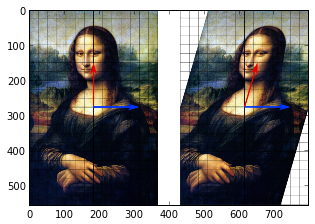

In [13]:
import urllib2
imshow(imread(urllib2.urlopen("http://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Mona_Lisa_eigenvector_grid.png/800px-Mona_Lisa_eigenvector_grid.png")))

(diagonalization)

Let $M$ be an $n\times n$ matrix and have $n$ linearly independent eigenvectors $u_1,...,u_n$ with eigenvalues $\lambda_1,...,\lambda_n$

If the eigenvectors are the columns of $S$, then

$$ S^{-1} M S = \Lambda = \hbox{diag}(\lambda_1,...,\lambda_n) $$

Reason:

$$ M S = M \left( u_1 ... u_n \right) = \left( M u_1 ... M u_n \right) = \left( \lambda_1 u_1 ... \lambda_n u_n \right ) = S \Lambda $$

If additionally $M$ is symmetric, we can choose $S$ to be an orthogonal matrix.

(orthogonal matrix)

An *orthogonal matrix* $Q$ is a real, square matrix where the columns and rows are orthogonal unit vectors.

Equivalently, $Q^T = Q^{-1}$ or $QQ^T = Q^TQ = I$.

If $Q$ is orthogonal, then $\hbox{det}(Q) = \pm 1$.

If $\hbox{det}(Q) = 1$, then $Q$ is a *rotation matrix* (otherwise it's a rotation plus reflection).

(trace and determinant)

The *determinant* of a matrix equals the product of the eigenvalues.

The *trace* of a matrix is the sum of its diagonal elements and the sum of its eigenvalues.

In [17]:
# trace and determinant
print M
print eig(Mr)
print "trace",trace(M)
print "trace",trace(Mr)
print "det",det(M)
print "det",det(Mr)

[[ 3.  0.]
 [ 0.  1.]]
(array([ 3.,  1.]), array([[ 0.76484219,  0.64421769],
       [-0.64421769,  0.76484219]]))
trace 4.0
trace 4.0
det 3.0
det 3.0


(proof sketches)

determinant:

$$ \det(M) = \det(S^{-1})\det(\Lambda)\det(S) = 1\cdot\prod\lambda_I \cdot 1$$

trace:

$$ \hbox{trace}(AB) = \hbox{trace}(BA) $$

$$ \hbox{trace}(S^{-1} ~ \Lambda S) = \hbox{trace}(\Lambda S ~ S^{-1}) = \hbox{trace}(\Lambda) $$

# Norms and Metrics

(norms)

Norms assign lengths to vectors and must satisfy:

$$||av|| = |a| ~||v||$$

$$||a+b|| \leq ||a||+||b||$$

$$||v|| = 0 \Leftrightarrow v=0$$

Norms imply metrics by:

$$ d(u,v) = || u - v || $$

(quadratic form as norm)

A *quadratic form* defines a norm on a vector space.

$$ ||x||_M = \sqrt{x^T M x} $$

It is equivalent to a rotation and rescaling of the vector space prior to measuring distances.

If $M = S^{-1}\Lambda S$, then $S$ is the rotation and $\lambda_i$ the rescaling of axis $i$.

(importance for pattern recognition)

When you take measurements in the real world:

- the measurements are often linear combinations of some underlying causes you are interested in
- the measurement scale of each measurement/cause is arbitrary

Quadratic norms allow you to compensate for these effects.